<a href="https://colab.research.google.com/github/Paul-mwaura/CrowdsourcingML/blob/main/Amazon_CrowdsourcingML_Final_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CrowdsourcingML on Amazon Data

## Business Understanding
The main objective of this study was to do a comprehensive comparative analysis of the  consensus algorithms in the aforementioned categories: EM-based, Non-EM-based and  classification algorithms. Given that each category has several algorithms under it, and the scope  of this research cannot cover them all, the study used a random sampling selection technique to  select sample algorithms in each category by chance. In [43], asserts that sampling is an efficient  way for a researcher to gain information about a broad category by selecting a  representative/sample from the broad group. This is applicable when faced with the limitations of  time or resources [44]. The algorithms randomly selected for experiments are as below: 
> EM-Based Algorithm 
* Gaussian Mixture 

> Non-EM-Based Algorithm 
* Voting Classifier 

> Classification Algorithm 
* Naïve Bayes 


## Data Understanding

Data under discussion is a collection by Pang, B. and Lee, L.2004. The dataset contains the  labels acquired from crowd-workers working for Amazon Mechanical Turk. The task in question  was to select whether movie reviews provided were either positive (1) or negative (0). The website  itself provided the gold/true labels for each of the movie reviews. 

Specifications of the Dataset 

The dataset contains 5 columns: 
* Worker ID 
* Task ID 
* Worker Label 
* Expert Label( Gold Label)
* Time-taken

Dataset Specifics 
* Dataset Characteristics : Bivariate
* Number of Attributes : 5
* Attributes Characteristics : Real
* Missing Values : None

Column Description
* Worker ID is the identification number of the crowd-worker given in alphanumeric  characters. 
* Task ID is the identification of the task assigned to the crowd-worker given in numerical. • Worker Label is the output provided by the crowd-worker for the task assigned and is given  as either (0) or (1).
* Gold Label is the output provided by the website for the given tasks and is given as either  (0) or (1). 
* Time taken is the duration of time it takes a crowd-worker to give an output to the assigned  task. 



## Import Necessary Libraries

In [4]:
pip install scikit-multilearn

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Algorithms
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

# Metric Libraries
from sklearn.metrics import accuracy_score
from sklearn import metrics

 
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [6]:
df = pd.read_csv("amazon.csv")
df.head()

,A1LZWU72K42V92,23,0,1,298
0,ASS4LIVDW452F,23,1,1,6
1,A2QAIIROYI52KO,23,1,1,96
2,A3PRX6CU0P34NE,23,1,1,175
3,A9KPCMO1J1LQF,23,1,1,7
4,A3PM8L29POUPBQ,23,1,1,19


**Rename the Columns**

In [7]:
df.columns = ['worker_id', 'task_id', 'worker_reviews', 'expert_reviews', 'time_taken']
df.head(2)

,worker_id,task_id,worker_reviews,expert_reviews,time_taken
0,ASS4LIVDW452F,23,1,1,6
1,A2QAIIROYI52KO,23,1,1,96


**Check Data Types**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   worker_id       9999 non-null   object
 1   task_id         9999 non-null   int64 
 2   worker_reviews  9999 non-null   int64 
 3   expert_reviews  9999 non-null   int64 
 4   time_taken      9999 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 390.7+ KB


**Get a Description of float and integer variables**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
task_id,9999.0,5231.690869,3038.048031,23.0,2678.0,5145.0,7788.5,10431.0
worker_reviews,9999.0,0.501150,0.500024,0.0,0.0,1.0,1.0,1.0
expert_reviews,9999.0,0.509951,0.499926,0.0,0.0,1.0,1.0,1.0
time_taken,9999.0,49.832983,149.816403,1.0,6.0,9.0,21.0,3265.0


**Check the size of the dataset**

In [10]:
df.shape

(9999, 5)

**Print dataset column names**

In [11]:
columns = df.columns
columns

Index(['worker_id', 'task_id', 'worker_reviews', 'expert_reviews',
       'time_taken'],
      dtype='object')

**Get the count of unique values in the columns**

In [12]:
for col in columns:
  print(f'Length of Unique values in {col} is: {len(df[col].unique())}')

Length of Unique values in worker_id is: 143
Length of Unique values in task_id is: 500
Length of Unique values in worker_reviews is: 2
Length of Unique values in expert_reviews is: 2
Length of Unique values in time_taken is: 527


## Data Cleaning

**Check for null values**

In [13]:
df.isna().sum()

worker_id         0
task_id           0
worker_reviews    0
expert_reviews    0
time_taken        0
dtype: int64

**Check for Duplicated Values**

In [14]:
df.duplicated().sum()

0

**Get dummy values for the worker_id column**

In [15]:
df.drop(['worker_id'], axis=1, inplace=True)
df.shape

(9999, 4)

### Outliers

Outlier ranges.
 4


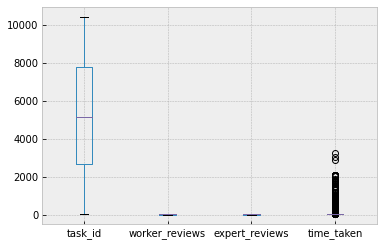

In [16]:
# OUTLIERS : Checking for Outliers by plotting a visual for the Data.
# 
# defining a funtion that takes the dataset name and numeric columns list as arguments 
# then returns a visual for the columns_list 
#
plt.style.use('bmh')

out_taken = df[['task_id', 'worker_reviews', 'expert_reviews', 'time_taken']]


# Plotting Outliers.
#
_t, taken = pd.DataFrame.boxplot(out_taken, return_type='both',  widths = 0.2)

outliers = [flier.get_ydata() for flier in taken["fliers"]]
out_liers = [i.tolist() for i in outliers]


print("Outlier ranges.\n", len(outliers))

In [17]:
# Function for counting number of outliers in our data columns and cheking the percentage for each
# ----
#
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [18]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in df:
    rows, columns = df.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(df[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

task_id has 0 outliers in total, which is 0.0% of data
worker_reviews has 0 outliers in total, which is 0.0% of data
expert_reviews has 0 outliers in total, which is 0.0% of data
time_taken has 140 outliers in total, which is 1.4% of data


In [19]:
# Getting ouliers from our dataframe using a z-test
#
from scipy import stats

z = np.abs(stats.zscore(df))
print(z)


[[1.71457176 0.99770241 0.98029217 0.29259263]
 [1.71457176 0.99770241 0.98029217 0.3081727 ]
 [1.71457176 0.99770241 0.98029217 0.83551116]
 ...
 [0.97347277 1.00230288 1.02010404 0.2992678 ]
 [0.97347277 1.00230288 1.02010404 0.30594297]
 [0.97347277 1.00230288 1.02010404 0.31261814]]


In [20]:
# Dropping and Confirming that our outliers have been dropped from the dataset.
#
df_o = df[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {df.shape[0]}")
print(f"New dataframe size: {df_o.shape[0]}")

Previous dataframe size : 9999
New dataframe size: 9859


In [21]:
df = df_o.copy()
df.shape

(9859, 4)

## Exploratory Data Analysis

### Scatter Plots

#### Worker Reviews

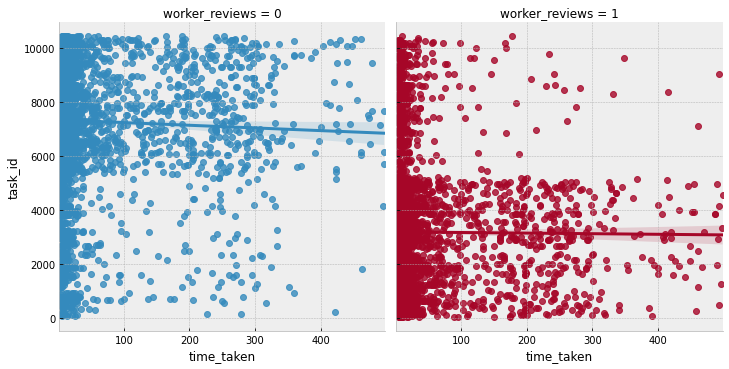

In [22]:
sns.lmplot(data=df, x="time_taken", y="task_id", col="worker_reviews", hue="worker_reviews")

#### Expert Reviews

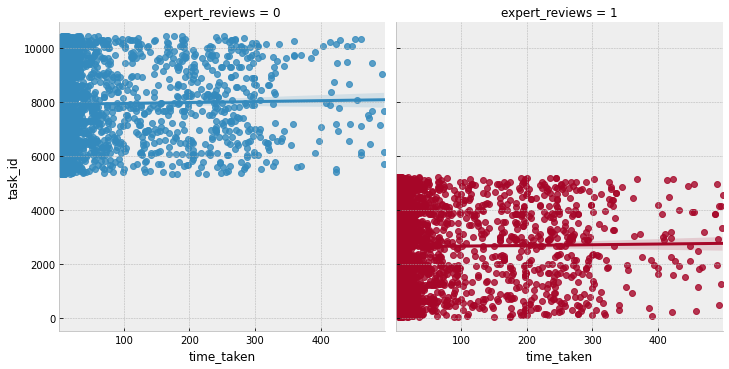

In [23]:
sns.lmplot(data=df, x="time_taken", y="task_id", col="expert_reviews", hue="expert_reviews")

In [24]:
x = df[(df['task_id']>5200) & (df['task_id']<5700)]
x['task_id'].unique()

array([5209, 5336, 5380, 5404, 5412, 5416, 5451, 5520, 5524, 5534, 5576,
       5606, 5639, 5646, 5653, 5667, 5688])

In [25]:
x.head()

,task_id,worker_reviews,expert_reviews,time_taken
6759,5209,1,1,6
6760,5209,1,1,5
6761,5209,1,1,7
6762,5209,1,1,4
6763,5209,1,1,3


###  Joint Plots

#### Worker Reviews

Text(0.5, 1.0, 'Time Taken and Task ID Joint Plot for Worker Reviews')

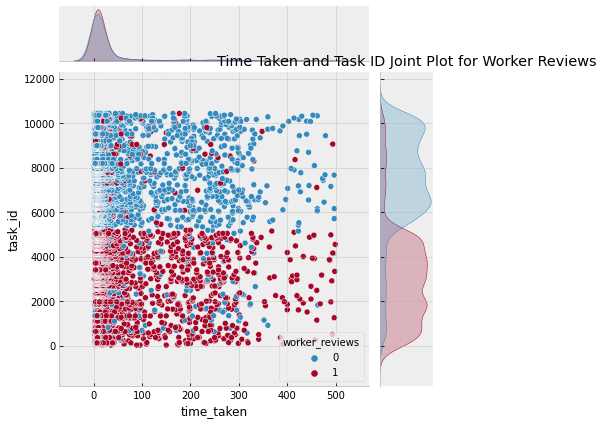

In [26]:
sns.jointplot(data=df, x="time_taken", y="task_id", hue="worker_reviews")
plt.title('Time Taken and Task ID Joint Plot for Worker Reviews')

#### Expert Reviews

Text(0.5, 1.0, 'Time Taken and Task ID Joint Plot for Expert Reviews')

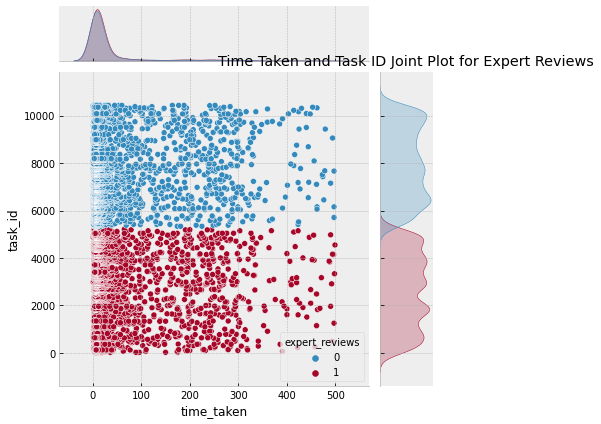

In [27]:
sns.jointplot(data=df, x="time_taken", y="task_id", hue="expert_reviews")
plt.title('Time Taken and Task ID Joint Plot for Expert Reviews')

## Implementing the solution 1

**Split data into x(features) and y(labels)**

In [28]:
x = df[['task_id', 'time_taken']]
y = df[['worker_reviews', 'expert_reviews']]
y.head(2)

,worker_reviews,expert_reviews
0,1,1
1,1,1


**Split data into train(80%)and test(20%)**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12)

### Classifier Chains


<a href='https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.ClassifierChain.html#sklearn.multioutput.ClassifierChain'>Classifier chains</a> is a machine learning method for problem transformation in multi-label classification. It combines the computational efficiency of the Binary Relevance method while still being able to take the label dependencies into account for classification.
>>
Each model makes a prediction in the order specified by the chain using all of the available features provided to the model plus the predictions of models that are earlier in the chain.
>>
When predicting, the true labels will not be available. Instead the predictions of each model are passed on to the subsequent models in the chain to be used as features.
>>
Clearly the order of the chain is important. The first model in the chain has no information about the other labels while the last model in the chain has features indicating the presence of all of the other labels. In general one does not know the optimal ordering of the models in the chain so typically many randomly ordered chains are fit and their predictions are averaged together.

#### GaussianNB Classifier

In [30]:
# using classifier chains

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
gaussian = GaussianNB()
gaussian_clf = ClassifierChain(gaussian)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# train
gaussian_clf.fit(X_train, y_train)

# predict
gaussian_preds = gaussian_clf.predict(X_test)

gaussian_score_1 = accuracy_score(y_test,gaussian_preds)*100

print(f'Gaussian accuracy score: {gaussian_score_1}%')

Gaussian accuracy score: 88.59026369168357%


In [31]:
gaussian_preds = pd.DataFrame.sparse.from_spmatrix(gaussian_preds)
gaussian_preds.columns=['worker', 'expert']

gaussian_preds.head()

,worker,expert
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0


In [32]:
gaussian_pred_w = gaussian_preds['worker']
y_test_gw = y_test['worker_reviews']
gaussian_pred_e = gaussian_preds['expert']
y_test_ge = y_test['expert_reviews']

gaussian_worker_precission_1 = metrics.precision_score(y_test_gw, gaussian_pred_w)*100
gaussian_worker_recall_1 = metrics.recall_score(y_test_gw, gaussian_pred_w)*100
gaussian_expert_precission_1 = metrics.precision_score(y_test_ge, gaussian_pred_e)*100
gaussian_expert_recall_1 = metrics.recall_score(y_test_ge, gaussian_pred_e)*100

print(f"Worker Precision:, {gaussian_worker_precission_1}")
print(f"Worker Recall:, {gaussian_worker_recall_1}\n")
print(f"Expert Precision:, {gaussian_expert_precission_1 }")
print(f"Expert Recall:, {gaussian_expert_recall_1 }")

Worker Precision:, 88.9917695473251
Worker Recall:, 88.26530612244898

Expert Precision:, 100.0
Expert Recall:, 99.08256880733946


**Confusion Matrix for Workers**

Predicted    0  1.0
Actual             
0           71   83
1          100  108


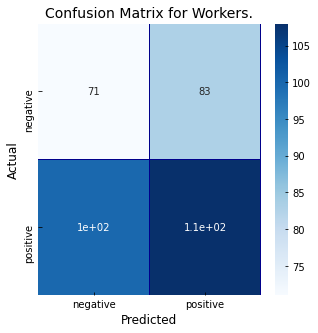

In [33]:
cm = pd.crosstab(y_test_gw, gaussian_pred_w, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Workers.', fontsize=14)
plt.show()
# 1= default
# 0 = No default

**Confusion Matrix for Experts**

Predicted   0  1.0
Actual            
0          77   82
1          94  109


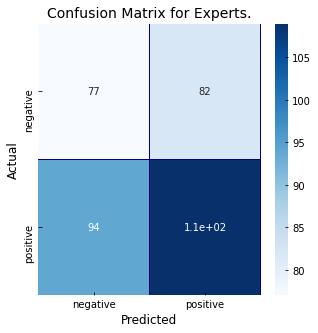

In [34]:
cm = pd.crosstab(y_test_ge, gaussian_pred_e, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Experts.', fontsize=14)
plt.show()
# 1= default
# 0 = No default

#### Logistic Regression

In [35]:
#Logistic Regression

log_reg = LogisticRegression()
lr_clf = ClassifierChain(log_reg)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# train
lr_clf.fit(X_train, y_train)

# predict
log_reg_preds = lr_clf.predict(X_test)

from sklearn import metrics
logistic_score_1 = accuracy_score(y_test,log_reg_preds)*100
print(f'Accuracy: {logistic_score_1}%')

Accuracy: 88.64097363083164%


In [36]:
log_reg_preds = pd.DataFrame.sparse.from_spmatrix(log_reg_preds)
log_reg_preds.columns=['worker_reviews', 'expert_reviews']
log_reg_preds.head(2)

,worker_reviews,expert_reviews
0,0.0,0.0
1,0.0,0.0


In [37]:
log_reg_pred_w = log_reg_preds['worker_reviews']
y_test_lw = y_test['worker_reviews']
log_reg_pred_e = log_reg_preds['expert_reviews']
y_test_le = y_test['expert_reviews']

lr_worker_precision_1 = metrics.precision_score(y_test_lw, log_reg_pred_w)*100
lr_worker_recall_1 = metrics.recall_score(y_test_lw, log_reg_pred_w)*100
lr_expert_precision_1 = metrics.precision_score(y_test_le, log_reg_pred_e)*100
lr_expert_recall_1 = metrics.recall_score(y_test_le, log_reg_pred_e)*100

print(f"Worker Precision:, {lr_worker_precision_1}")
print(f"Worker Recall:, {lr_worker_recall_1}\n")
print(f"Expert Precision:, {lr_expert_precision_1}")
print(f"Expert Recall:, {lr_expert_recall_1}")

Worker Precision:, 88.90030832476874
Worker Recall:, 88.26530612244898

Expert Precision:, 100.0
Expert Recall:, 99.69418960244649


**Confusion Matrix for Workers**

Predicted   0  1.0
Actual            
0          71   83
1          99  109


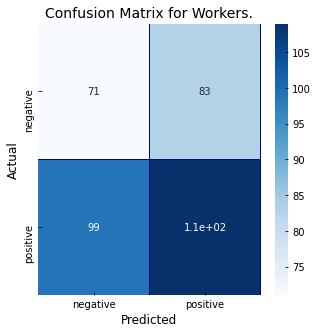

In [38]:
cm = pd.crosstab(y_test_lw, log_reg_pred_w, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Workers.', fontsize=14)
plt.show()
# 1= default
# 0 = No default

**Confusion Matrix for Experts**

Predicted   0  1.0
Actual            
0          76   83
1          93  110


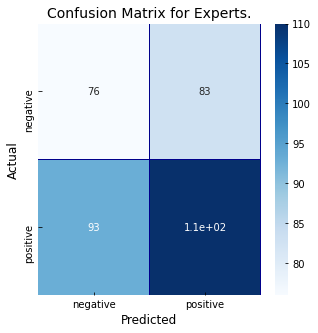

In [39]:
cm = pd.crosstab(y_test_le, log_reg_pred_e, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Experts.', fontsize=14)
plt.show()
# 1= default
# 0 = No default

#### KNeighbors Classifier

In [40]:
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
	models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
	models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
	models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
	models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='soft')
	return ensemble

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn1'] = KNeighborsClassifier(n_neighbors=1)
	models['knn3'] = KNeighborsClassifier(n_neighbors=3)
	models['knn5'] = KNeighborsClassifier(n_neighbors=5)
	models['knn7'] = KNeighborsClassifier(n_neighbors=7)
	models['knn9'] = KNeighborsClassifier(n_neighbors=9)
	models['soft_voting'] = get_voting()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>knn1 86.822 (0.010)
>knn3 89.561 (0.010)
>knn5 90.178 (0.009)
>knn7 90.267 (0.009)
>knn9 90.512 (0.009)
>soft_voting 89.865 (0.010)


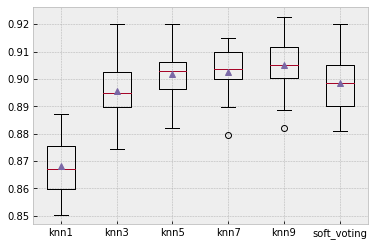

In [41]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot


X = df[['task_id', 'time_taken']]
y_workers = df['worker_reviews']

X_train, X_test, y_train, y_test = train_test_split(X, y_workers, test_size=0.20, random_state=12)

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores)*100, std(scores)))
 
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [70]:
knn  = models.get('soft_voting')
knn

VotingClassifier(estimators=[('knn1',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=1,
                                                   p=2, weights='uniform')),
                             ('knn3',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=3,
                                                   p=2, weights='uniform')),
                             ('knn5',
                      

In [71]:
#KNN Classifier
# predict
x = df[['task_id', 'time_taken']]
y = df[['worker_reviews', 'expert_reviews']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12)

knn_clf = ClassifierChain(model)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# train
knn_clf.fit(X_train, y_train)

# predict
knn_preds = knn_clf.predict(X_test)

from sklearn import metrics
knn_score_1 = accuracy_score(y_test,knn_preds)*100
print(f'Accuracy: {knn_score_1}%')

Accuracy: 87.7789046653144%


In [72]:
knn_preds = pd.DataFrame.sparse.from_spmatrix(knn_preds)
knn_preds.columns=['worker_reviews', 'expert_reviews']
knn_preds.head()

,worker_reviews,expert_reviews
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0


In [73]:
knn_pred_w = knn_preds['worker_reviews']
y_test_knnw = y_test['worker_reviews']
knn_pred_e = knn_preds['expert_reviews']
y_test_knne = y_test['expert_reviews']

knn_worker_precision_1 = metrics.precision_score(y_test_knnw, knn_pred_w)*100
knn_worker_recall_1 = metrics.recall_score(y_test_knnw, knn_pred_w)*100
knn_expert_precision_1 = metrics.precision_score(y_test_knne, knn_pred_e)*100
knn_expert_recall_1 = metrics.recall_score(y_test_knne, knn_pred_e)*100

print(f"Worker Precision:, {knn_worker_precision_1}")
print(f"Worker Recall:, {knn_worker_recall_1}\n")
print(f"Expert Precision:, {knn_expert_precision_1}")
print(f"Expert Recall:, {knn_expert_recall_1}")

Worker Precision:, 87.67820773930754
Worker Recall:, 87.85714285714286

Expert Precision:, 99.79633401221996
Expert Recall:, 99.89806320081549


Predicted    0  1.0
Actual             
0           70   84
1          101  107


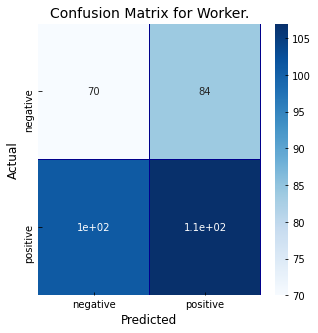

In [74]:
cm = pd.crosstab(y_test_knnw, knn_pred_w, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Worker.', fontsize=14)
plt.show()
# 1= default
# 0 = No default

Predicted   0  1.0
Actual            
0          75   84
1          93  110


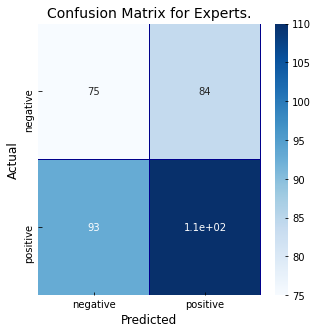

In [50]:
cm = pd.crosstab(y_test_knne, knn_pred_e, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Experts.', fontsize=14)
plt.show()
# 1= default
# 0 = No default

## Bias detection and mitigation

### Install aif360

In [51]:
pip install aif360[all]

     |████████████████████████████████| 184kB 4.2MB/s 
     |████████████████████████████████| 9.2MB 17.4MB/s 
     |████████████████████████████████| 21.2MB 1.3MB/s 
     |████████████████████████████████| 2.6MB 28.7MB/s 
     |████████████████████████████████| 972kB 28.0MB/s 
     |████████████████████████████████| 276kB 44.1MB/s 
     |████████████████████████████████| 358kB 24.3MB/s 
     |████████████████████████████████| 552kB 34.4MB/s 
     |████████████████████████████████| 235kB 41.6MB/s 
     |████████████████████████████████| 3.4MB 32.5MB/s 
     |████████████████████████████████| 21.6MB 54.6MB/s 
     |████████████████████████████████| 25.3MB 1.5MB/s 
     |████████████████████████████████| 747kB 27.4MB/s 
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394769 sha256=7d57e8047525da7810f8a61765cc200b5fe73b7701e4237604a2c01727cc3b05
  Stored in directory: /root/.cache/pip/wheels/66/82/7b/ac2a79b8caf97e15ed415162a7f272cbba1e2e2

### a) Identifying Bias in the Actual Data

In [113]:
positive_df = df[df['worker_reviews'] == 1]
num_of_privileged = len(positive_df)

negative_df = df[df['worker_reviews'] == 0]
num_of_unprivileged = len(negative_df)

print(f'Num privileged: {num_of_privileged}')
print(f'Num unprivileged: {num_of_unprivileged}\n')

unprivileged_outcomes = negative_df[negative_df['expert_reviews'] == 1].shape[0]
unprivileged_ratio = unprivileged_outcomes/num_of_unprivileged
print(f'Unprivileged ratio: {unprivileged_ratio}')

privileged_outcomes = positive_df[positive_df['expert_reviews'] == 1].shape[0]
privileged_ratio = privileged_outcomes/num_of_privileged
print(f'Privileged ratio: {privileged_ratio}\n')

# Calculating disparate impact
disparate_impact_actual_1 = unprivileged_ratio / privileged_ratio
print(f'Disparate Impact: {disparate_impact_actual_1}')

Num privileged: 4939
Num unprivileged: 4920

Unprivileged ratio: 0.11483739837398374
Privileged ratio: 0.9024093946142944

Disparate Impact: 0.12725643046199364


The industry standard is a four-fifths rule: if the unprivileged group receives a positive outcome less than 80% of their proportion of the privilege group, this is a disparate impact violation. However, you may decide to increase this for your business.

In this scenario, we are below the threshold of 0.98 so we deem this to be fair.

A disparate income ratio of 1 indicates complete equality.

### b) Identifying Bias in the Predicted Data Before Mitigation

#### Disparate Impact in Gaussian
>**(Before Bias Mitigation)**

In [53]:
positive_df = gaussian_preds[gaussian_preds['worker'] == 1]
num_of_privileged = len(positive_df)

negative_df = gaussian_preds[gaussian_preds['worker'] == 0]
num_of_unprivileged = len(negative_df)

print(f'Num privileged: {num_of_privileged}')
print(f'Num unprivileged: {num_of_unprivileged}\n')

unprivileged_outcomes = negative_df[negative_df['expert'] == 1].shape[0]
unprivileged_ratio = unprivileged_outcomes/num_of_unprivileged
print(f'Unprivileged ratio: {unprivileged_ratio}')

privileged_outcomes = positive_df[positive_df['expert'] == 1].shape[0]
privileged_ratio = privileged_outcomes/num_of_privileged
print(f'Privileged ratio: {privileged_ratio}\n')
print('___________________________________________________')
# Calculating disparate impact
disparate_impact_gaussian_1 = unprivileged_ratio / privileged_ratio
print(f'Disparate Impact: {disparate_impact_gaussian_1}')

Num privileged: 972
Num unprivileged: 1000

Unprivileged ratio: 0.0
Privileged ratio: 1.0

___________________________________________________
Disparate Impact: 0.0


#### Disparate Impact in Logistic Regression
>**(Before Bias Mitigation)**

In [54]:
positive_df = log_reg_preds[log_reg_preds['worker_reviews'] == 1]
num_of_privileged = len(positive_df)

negative_df = log_reg_preds[log_reg_preds['worker_reviews'] == 0]
num_of_unprivileged = len(negative_df)

print(f'Num privileged: {num_of_privileged}')
print(f'Num unprivileged: {num_of_unprivileged}\n')

unprivileged_outcomes = negative_df[negative_df['expert_reviews'] == 1].shape[0]
unprivileged_ratio = unprivileged_outcomes/num_of_unprivileged
print(f'Unprivileged ratio: {unprivileged_ratio}')

privileged_outcomes = positive_df[positive_df['expert_reviews'] == 1].shape[0]
privileged_ratio = privileged_outcomes/num_of_privileged
print(f'Privileged ratio: {privileged_ratio}\n')
print('___________________________________________________')
# Calculating disparate impact
disparate_impact_logistic_1 = unprivileged_ratio / privileged_ratio
print(f'Disparate Impact: {disparate_impact_logistic_1}')

Num privileged: 973
Num unprivileged: 999

Unprivileged ratio: 0.005005005005005005
Privileged ratio: 1.0

___________________________________________________
Disparate Impact: 0.005005005005005005


#### Disparate Impact in KNN
>**(Before Bias Mitigation)**

In [109]:
positive_df = knn_preds[knn_preds['worker_reviews'] == 1]
num_of_privileged = len(positive_df)

negative_df = knn_preds[knn_preds['worker_reviews'] == 0]
num_of_unprivileged = len(negative_df)

print(f'Num privileged: {num_of_privileged}')
print(f'Num unprivileged: {num_of_unprivileged}\n')

unprivileged_outcomes = negative_df[negative_df['expert_reviews'] == 1].shape[0]
unprivileged_ratio = unprivileged_outcomes/num_of_unprivileged
print(f'Unprivileged ratio: {unprivileged_ratio}')

privileged_outcomes = positive_df[positive_df['expert_reviews'] == 1].shape[0]
privileged_ratio = privileged_outcomes/num_of_privileged
print(f'Privileged ratio: {privileged_ratio}\n')
print('___________________________________________________')
# Calculating disparate impact
disparate_impact_knn_1 = unprivileged_ratio / privileged_ratio
print(f'Disparate Impact: {disparate_impact_knn_1}')

Num privileged: 982
Num unprivileged: 990

Unprivileged ratio: 0.03535353535353535
Privileged ratio: 0.9643584521384929

___________________________________________________
Disparate Impact: 0.036660160208206664


### Mitigating Bias with AI Fairness 360

In [56]:
import aif360
from aif360.algorithms.preprocessing import DisparateImpactRemover
binaryLabelDataset = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=df,
    label_names=['expert_reviews'],
    protected_attribute_names=['worker_reviews'])

#### Transforming the Data

In [57]:
di = DisparateImpactRemover(repair_level = 1.0)
dataset_transf_train = di.fit_transform(binaryLabelDataset)
transformed = dataset_transf_train.convert_to_dataframe()[0]
transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
task_id,9859.0,4447.027386,2743.218003,23.0,2334.0,4003.0,6207.0,10431.0
worker_reviews,9859.0,0.500964,0.500024,0.0,0.0,1.0,1.0,1.0
time_taken,9859.0,35.878081,74.384259,1.0,5.0,8.0,19.0,497.0
expert_reviews,9859.0,0.509382,0.499937,0.0,0.0,1.0,1.0,1.0


#### Split the Transformed Data into Train and Test Data.

In [58]:
x_trans = transformed[['task_id', 'time_taken']]
y = transformed[['worker_reviews', 'expert_reviews']]
scaler = StandardScaler()

x_trans = scaler.fit_transform(x_trans)
x_trans_train,x_trans_test,y_trans_train,y_trans_test = train_test_split(x_trans, y, test_size=0.2, random_state = 0)

### Implementig the Solution 2

#### GaussianNB Classifier

In [59]:
gaussian_clf.fit(x_trans_train, y_trans_train)

y_trans_preds_g = gaussian_clf.predict(x_trans_test)

gaussian_score_2 = accuracy_score(y_trans_test, y_trans_preds_g)*100
print(f'Gaussian accuracy score: {gaussian_score_2}%\n')

# Convert predictions from sparse matrix to dataframe.
y_trans_preds_g = pd.DataFrame.sparse.from_spmatrix(y_trans_preds_g)
y_trans_preds_g.columns=['worker_reviews', 'expert_reviews']

# Split the labels into two. (wokers and experts)
gaussian_trans_pred_w = y_trans_preds_g['worker_reviews']
y_trans_test_gw = y_trans_test['worker_reviews']
gaussian_trans_pred_e = y_trans_preds_g['expert_reviews']
y_trans_test_ge = y_test['expert_reviews']

gaussian_worker_precission_2 = metrics.precision_score(y_trans_test_gw, gaussian_trans_pred_w)*100
gaussian_worker_recall_2 = metrics.recall_score(y_trans_test_gw, gaussian_trans_pred_w)*100
gaussian_expert_precission_2 = metrics.precision_score(y_trans_test_gw, gaussian_trans_pred_e)*100
gaussian_expert_recall_2 = metrics.recall_score(y_trans_test_gw, gaussian_trans_pred_e)*100

print(f"Worker Precision:, {gaussian_worker_precission_2}")
print(f"Worker Recall:, {gaussian_worker_recall_2}\n")
print(f"Expert Precision:, {gaussian_expert_precission_2}")
print(f"Expert Recall:, {gaussian_expert_recall_2}")


Gaussian accuracy score: 68.86409736308316%

Worker Precision:, 65.44293695131684
Worker Recall:, 82.16432865731463

Expert Precision:, 65.44293695131684
Expert Recall:, 82.16432865731463


#### Logistic Regression

In [60]:
lr_clf.fit(x_trans_train, y_trans_train)

y_trans_preds_lr = lr_clf.predict(x_trans_test)

logistic_score_2 = accuracy_score(y_trans_test, y_trans_preds_lr)*100
print(f'Logistic accuracy score: {logistic_score_2}%\n')

# Convert predictions from sparse matrix to dataframe.
y_trans_preds_lr = pd.DataFrame.sparse.from_spmatrix(y_trans_preds_lr)
y_trans_preds_lr.columns=['worker_reviews', 'expert_reviews']

# Split the labels into two. (wokers and experts)
lr_trans_pred_w = y_trans_preds_lr['worker_reviews']
y_trans_test_lw = y_trans_test['worker_reviews']
lr_trans_pred_e = y_trans_preds_lr['expert_reviews']
y_trans_test_le = y_trans_test['expert_reviews']

lr_worker_precision_2 = metrics.precision_score(y_trans_test_lw, lr_trans_pred_w)*100
lr_worker_recall_2 = metrics.recall_score(y_trans_test_lw, lr_trans_pred_w)*100
lr_expert_precision_2 = metrics.precision_score(y_trans_test_lw, lr_trans_pred_e)*100
lr_expert_recall_2 = metrics.recall_score(y_trans_test_lw, lr_trans_pred_e)*100

print(f"Worker Precision:, {lr_worker_precision_2}")
print(f"Worker Recall:, {lr_worker_recall_2}\n")
print(f"Expert Precision:, {lr_expert_precision_2}")
print(f"Expert Recall:, {lr_expert_recall_2}")


Logistic accuracy score: 69.26977687626776%

Worker Precision:, 67.85063752276868
Worker Recall:, 74.64929859719439

Expert Precision:, 67.85063752276868
Expert Recall:, 74.64929859719439


#### KNeighbors Classifier

In [76]:
x_trans_train.shape, y_trans_train.shape

((7887, 2), (7887, 2))

In [78]:
# train
knn_clf = ClassifierChain(model)

knn_clf.fit(x_trans_train, y_trans_train)

# predict
knn_trans_preds = knn_clf.predict(x_trans_test)

knn_score_2 = accuracy_score(y_trans_test,knn_trans_preds)*100
print(f'KNN accuracy score: {knn_score_2}%\n')

# Convert predictions from sparse matrix to dataframe.
knn_trans_preds = pd.DataFrame.sparse.from_spmatrix(knn_trans_preds)
knn_trans_preds.columns=['worker_reviews', 'expert_reviews']

# Split the labels into two. (wokers and experts)
knn_trans_pred_w = knn_trans_preds['worker_reviews']
y_trans_test_kw = y_trans_test['worker_reviews']
knn_trans_pred_e = knn_trans_preds['expert_reviews']
y_trans_test_ke = y_trans_test['expert_reviews']

knn_worker_precision_2 = metrics.precision_score(y_trans_test_kw, knn_trans_pred_w)*100
knn_worker_recall_2 = metrics.recall_score(y_trans_test_kw, knn_trans_pred_w)*100
knn_expert_precision_2 = metrics.precision_score(y_trans_test_kw, knn_trans_pred_e)*100
knn_expert_recall_2 = metrics.recall_score(y_trans_test_kw, knn_trans_pred_e)*100

print(f"Worker Precision:, {knn_worker_precision_2}")
print(f"Worker Recall:, {knn_worker_recall_2}\n")
print(f"Expert Precision:, {knn_expert_precision_2}")
print(f"Expert Recall:, {knn_expert_recall_2}")


KNN accuracy score: 68.20486815415822%

Worker Precision:, 68.68076535750251
Worker Recall:, 68.33667334669339

Expert Precision:, 70.27833001988071
Expert Recall:, 70.84168336673346


### c) Identifying Bias in the Transformed Data

In [79]:
positive_df = transformed[transformed['worker_reviews'] == 1]
num_of_privileged = len(positive_df)

negative_df = transformed[transformed['worker_reviews'] == 0]
num_of_unprivileged = len(negative_df)

print(f'Num privileged: {num_of_privileged}')
print(f'Num unprivileged: {num_of_unprivileged}\n')

unprivileged_outcomes = negative_df[negative_df['expert_reviews'] == 1].shape[0]
unprivileged_ratio = unprivileged_outcomes/num_of_unprivileged
print(f'Unprivileged ratio: {unprivileged_ratio}')

privileged_outcomes = positive_df[positive_df['expert_reviews'] == 1].shape[0]
privileged_ratio = privileged_outcomes/num_of_privileged
print(f'Privileged ratio: {privileged_ratio}\n')
print('___________________________________________________')
# Calculating disparate impact
disparate_impact_transform = unprivileged_ratio / privileged_ratio
print(f'Disparate Impact: {disparate_impact_transform}')

Num privileged: 4939
Num unprivileged: 4920

Unprivileged ratio: 0.11483739837398374
Privileged ratio: 0.9024093946142944

___________________________________________________
Disparate Impact: 0.12725643046199364


### d) Identifying Bias in the Data After Using Machine Learning Models.

#### Disparate Impact on Data After Mitigating Bias

In [114]:
positive_df = y[y['worker_reviews'] == 1]
num_of_privileged = len(positive_df)

negative_df = y[y['worker_reviews'] == 0]
num_of_unprivileged = len(negative_df)

print(f'Num privileged: {num_of_privileged}')
print(f'Num unprivileged: {num_of_unprivileged}\n')

unprivileged_outcomes = y[y['expert_reviews'] == 1].shape[0]
unprivileged_ratio = unprivileged_outcomes/num_of_unprivileged
print(f'Unprivileged ratio: {unprivileged_ratio}')

privileged_outcomes = y[y['expert_reviews'] == 1].shape[0]
privileged_ratio = privileged_outcomes/num_of_privileged
print(f'Privileged ratio: {privileged_ratio}\n')

# Calculating disparate impact
disparate_impact_actual_2 = unprivileged_ratio / privileged_ratio
print(f'Disparate Impact: {disparate_impact_actual_2}')

Num privileged: 4939
Num unprivileged: 4920

Unprivileged ratio: 1.0207317073170732
Privileged ratio: 1.0168050212593642

Disparate Impact: 1.0038617886178862


#### Disparate Impact in GaussianNB
> **After Bias Mitigation**

In [80]:
positive_df = y_trans_preds_g[y_trans_preds_g['worker_reviews'] == 1]
num_of_privileged = len(positive_df)

negative_df = y_trans_preds_g[y_trans_preds_g['worker_reviews'] == 0]
num_of_unprivileged = len(negative_df)

print(f'Num privileged: {num_of_privileged}')
print(f'Num unprivileged: {num_of_unprivileged}\n')

unprivileged_outcomes = negative_df[negative_df['expert_reviews'] == 1].shape[0]
unprivileged_ratio = unprivileged_outcomes/num_of_unprivileged
print(f'Unprivileged ratio: {unprivileged_ratio}')

privileged_outcomes = positive_df[positive_df['expert_reviews'] == 1].shape[0]
privileged_ratio = privileged_outcomes/num_of_privileged
print(f'Privileged ratio: {privileged_ratio}\n')
print('___________________________________________________')
# Calculating disparate impact
disparate_impact_gaussian_2 = unprivileged_ratio / privileged_ratio
print(f'Disparate Impact: {disparate_impact_gaussian_2}')

Num privileged: 1253
Num unprivileged: 719

Unprivileged ratio: 0.0
Privileged ratio: 1.0

___________________________________________________
Disparate Impact: 0.0


#### Disparate Impact in Logistic Regression
> **After Bias Mitigation**

In [81]:
positive_df = y_trans_preds_lr[y_trans_preds_lr['worker_reviews'] == 1]
num_of_privileged = len(positive_df)

negative_df = y_trans_preds_lr[y_trans_preds_lr['worker_reviews'] == 0]
num_of_unprivileged = len(negative_df)

print(f'Num privileged: {num_of_privileged}')
print(f'Num unprivileged: {num_of_unprivileged}\n')

unprivileged_outcomes = negative_df[negative_df['expert_reviews'] == 1].shape[0]
unprivileged_ratio = unprivileged_outcomes/num_of_unprivileged
print(f'Unprivileged ratio: {unprivileged_ratio}')

privileged_outcomes = positive_df[positive_df['expert_reviews'] == 1].shape[0]
privileged_ratio = privileged_outcomes/num_of_privileged
print(f'Privileged ratio: {privileged_ratio}\n')
print('___________________________________________________')
# Calculating disparate impact
disparate_impact_logistic_2 = unprivileged_ratio / privileged_ratio
print(f'Disparate Impact: {disparate_impact_logistic_2}')

Num privileged: 1098
Num unprivileged: 874

Unprivileged ratio: 0.0
Privileged ratio: 1.0

___________________________________________________
Disparate Impact: 0.0


#### Disparate Impact in KNN
> **After Bias Mitigation**

In [108]:
positive_df = knn_trans_preds[knn_trans_preds['worker_reviews'] == 1]
num_of_privileged = len(positive_df)

negative_df = knn_trans_preds[knn_trans_preds['worker_reviews'] == 0]
num_of_unprivileged = len(negative_df)

print(f'Num privileged: {num_of_privileged}')
print(f'Num unprivileged: {num_of_unprivileged}\n')

unprivileged_outcomes = negative_df[negative_df['expert_reviews'] == 1].shape[0]
unprivileged_ratio = unprivileged_outcomes/num_of_unprivileged
print(f'Unprivileged ratio: {unprivileged_ratio}')

privileged_outcomes = positive_df[positive_df['expert_reviews'] == 1].shape[0]
privileged_ratio = privileged_outcomes/num_of_privileged
print(f'Privileged ratio: {privileged_ratio}\n')
print('___________________________________________________')
# Calculating disparate impact
disparate_impact_knn_2 = unprivileged_ratio / privileged_ratio
print(f'Disparate Impact: {disparate_impact_knn_2}')

Num privileged: 993
Num unprivileged: 979

Unprivileged ratio: 0.049029622063329927
Privileged ratio: 0.9647532729103726

___________________________________________________
Disparate Impact: 0.0508208921804662


### Metric Scores

#### Accuracy Score

In [87]:
accuracy_score_df1 = pd.DataFrame()
accuracy_score_df2 = pd.DataFrame()
accuracy_score_df = pd.DataFrame()

accuracy_score_df['model'] = ['gaussian score 1', 'gaussian score 2', 'logistic score 1', 
                              'logistic score 2', 'knn score 1', 'knn score 2']
accuracy_score_df['accuracy score'] = [gaussian_score_1, gaussian_score_2, logistic_score_1,
                                        logistic_score_2, knn_score_1, knn_score_2]

accuracy_score_df.T

,0,1,2,3,4,5
model,gaussian score 1,gaussian score 2,logistic score 1,logistic score 2,knn score 1,knn score 2
accuracy score,88.5903,68.8641,88.641,69.2698,87.7789,68.2049


##### Visualize The Accuracy Scores

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

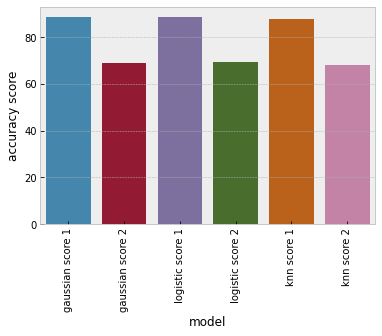

In [88]:
sns.barplot(x="model", y="accuracy score", data=accuracy_score_df)
plt.xticks(rotation=90)

##### **Findings**
The accuracy scores of all models decreased after bias mitigation. This however does not indicate that the models performed poorly after bias mitigation. The high performance before bias mitigation might be as a result of overfiting whereby the models do not take into account the presence of bias in the data.

The models appears to have an almost similar accuracy score before and after bias mitigation.

We will go ahead and analyze the disparate impact ratio of all the models before and after bias mitigation in order to identify how well the models performed after the bias mitigation.

#### Precision and Recall

##### Gaussian

In [96]:
precision = pd.DataFrame()
recall = pd.DataFrame()
gaussian = pd.DataFrame()

precision['precision'] = [gaussian_worker_precission_1, gaussian_expert_precission_1,
                            gaussian_worker_precission_2, gaussian_expert_precission_2] 
                            
recall['recall'] = [gaussian_worker_recall_1, gaussian_expert_recall_1,
                      gaussian_worker_recall_2, gaussian_expert_recall_2]

gaussian['models'] = ['gaussian worker 1', 'gaussian expert 1',
                        'gaussian worker 2', 'gaussian expert 2']



gaussian = pd.concat([gaussian, precision, recall], axis=1)
gaussian.T

,0,1,2,3
models,gaussian worker 1,gaussian expert 1,gaussian worker 2,gaussian expert 2
precision,88.9918,100,65.4429,65.4429
recall,88.2653,99.0826,82.1643,82.1643


##### Logistic

In [99]:
precision = pd.DataFrame()
recall = pd.DataFrame()
logistic = pd.DataFrame()

precision['precision'] = [lr_worker_precision_1, lr_expert_precision_1,
                          lr_worker_precision_2, lr_expert_precision_2]

recall['recall'] = [lr_worker_recall_1, lr_expert_recall_1,
                    lr_worker_recall_2, lr_expert_recall_2]
                    
logistic['models'] = ['logistic worker 1', 'logistic expert 1',
                      'logistic worker 2', 'logistic expert 2']



logistic = pd.concat([logistic, precision, recall], axis=1)

logistic.T

,0,1,2,3
models,logistic worker 1,logistic expert 1,logistic worker 2,logistic expert 2
precision,88.9003,100,67.8506,67.8506
recall,88.2653,99.6942,74.6493,74.6493


##### KNN

In [102]:
precision = pd.DataFrame()
recall = pd.DataFrame()
knn = pd.DataFrame()

precision['precision'] = [knn_worker_precision_1, knn_expert_precision_1,
                          knn_worker_precision_2, knn_expert_precision_2] 

recall['recall'] = [knn_worker_recall_1, knn_expert_recall_1,
                    knn_worker_recall_2, knn_expert_recall_2]

knn['models'] = ['knn worker 1', 'knn expert 1',
                    'knn worker 2', 'knn expert 2']



knn = pd.concat([knn, precision, recall], axis=1)

knn.T

,0,1,2,3
models,knn worker 1,knn expert 1,knn worker 2,knn expert 2
precision,87.6782,99.7963,68.6808,70.2783
recall,87.8571,99.8981,68.3367,70.8417


#### Combining All Model Performances

In [104]:
models = pd.concat([gaussian, logistic, knn], axis=0)
models.T

,0,1,2,3,0,1,2,3,0,1,2,3
models,gaussian worker 1,gaussian expert 1,gaussian worker 2,gaussian expert 2,logistic worker 1,logistic expert 1,logistic worker 2,logistic expert 2,knn worker 1,knn expert 1,knn worker 2,knn expert 2
precision,88.9918,100,65.4429,65.4429,88.9003,100,67.8506,67.8506,87.6782,99.7963,68.6808,70.2783
recall,88.2653,99.0826,82.1643,82.1643,88.2653,99.6942,74.6493,74.6493,87.8571,99.8981,68.3367,70.8417


#### Visualize Precision Scores

##### Precision Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

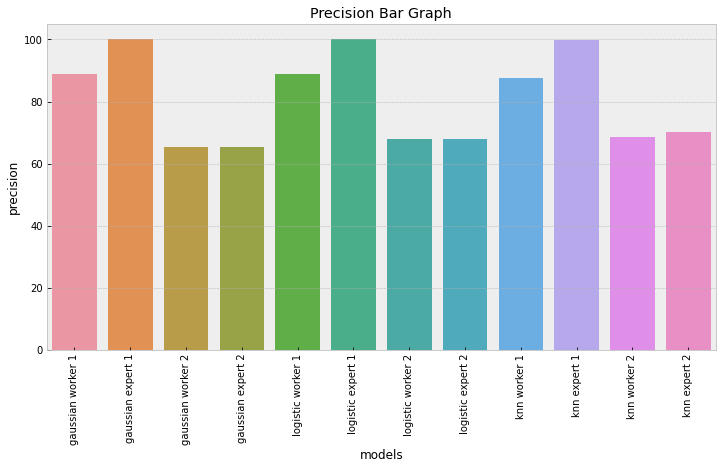

In [105]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x="models", y="precision", data=models, ax=ax)
plt.title('Precision Bar Graph')
plt.xticks(rotation=90)

##### **Findings**
The Precision scores of all models decreased after bias mitigation. This can be as a result of overfitting.

The KNN model however appears to have the highest recall for both before and after bias mitigation, while Gaussian model has the lowest recall before and after bias mitigation.

##### Recall Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

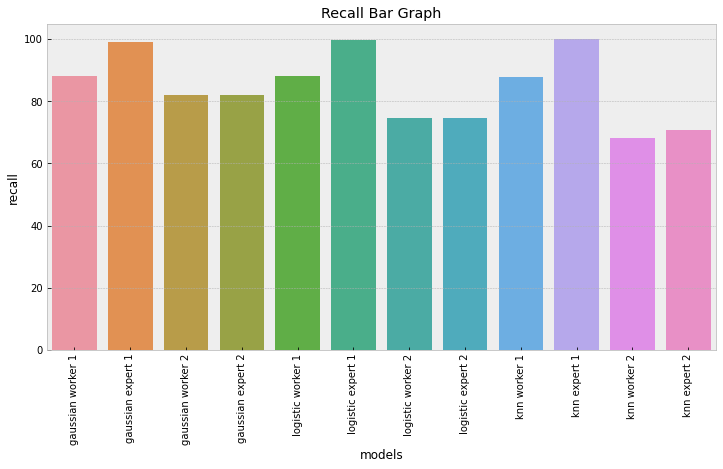

In [106]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x="models", y="recall", data=models, ax=ax)
plt.title('Recall Bar Graph')
plt.xticks(rotation=90)

##### **Findings**
The Recall scores of all models decreased after bias mitigation. This can be as a result of overfitting.

The Gaussian model however appears to have the highest recall for both before and after bias mitigation, while Knn model has the lowest recall before and after bias mitigation.

#### Disparate Impact Dataset

In [118]:
# Disparate Impact Dataset.
disparate_impact = pd.DataFrame()
disparate_impact['disparate_data'] = ['Actual_Before', 'Actual_After', 'gaussian 1', 'gaussian 2', 'logistic_1',
                                  'logistic 2', 'knn 1', 'knn 2']

disparate_impact['disparate_impact'] = [disparate_impact_actual_1, disparate_impact_actual_2,
                                        disparate_impact_gaussian_1, disparate_impact_gaussian_2,
                                        disparate_impact_logistic_1, disparate_impact_logistic_2,
                                        disparate_impact_knn_1, disparate_impact_knn_2]

disparate_impact.T

,0,1,2,3,4,5,6,7
disparate_data,Actual_Before,Actual_After,gaussian 1,gaussian 2,logistic_1,logistic 2,knn 1,knn 2
disparate_impact,0.127256,1.00386,0,0,0.00500501,0,0.0366602,0.0508209


##### Disparate Impact Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

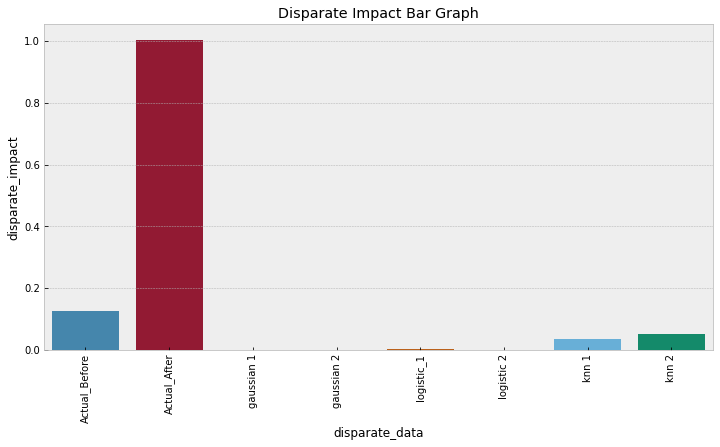

In [119]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x="disparate_data", y="disparate_impact", data=disparate_impact, ax=ax)
plt.title('Disparate Impact Bar Graph')
plt.xticks(rotation=90)

### Findings.
**Bias on Data**
>>
Bias in the data reduced drastically after bias mitigation with AI Fairness 360. This is indicated by the sharp increase in the disparate impact ratio from 0.127256 before mitigation to 1.00386 after mitigation.

**Gaussian (EM Based) Algorithm**
>>
The disparate impact ratio in gaussian model was 0 before bias mitigation and it was 0 after bias mitigation. This indicates that there was no improvement in the model after bias mitigation.

**Logistic (Classification) Algorithm**
>>
The disparate impact ratio of Logistic regression model was 0.00500501 before bias mitigation and	0 after bias mitigation. This indicates that the model perfomed poorly after bias mitigation than it did before bias mitigation.

**KNeighbors Classifier (Non-EM Based) Algorithm**
>> 
The disparate impact ratioof KNN algorithm was 0.0366602	before bias mitigation and 0.0508209 after bias mitigation. This indicates an improvement in the model performance when bias mitigation measures are taken into consideration.
